<br>
<h1 style="font-family:sans-serif; text-align:center"> 
<!--     <span style='color: pink'> Twitter analysis of </span> -->
    <span style='color: white; font-size:50%; text-shadow: 0px 0px 15px black'> Twitter analysis of </span>
<!--     <span style='color:#00acee'> Twitter analysis of </span> -->
<!--     <span style="-webkit-text-stroke"> Twitter analysis of</span> -->
<!--     <span class="hr3" style='color:#e40843; letter-spacing: 4px; font-size:105%'> Canada</span> -->
    <span class="hr3" style='color:#e40843; font-size:60%; text-shadow: 0px 0px 30px pink'>Canada </span> <span class="hr3" style='color:gray; font-size:50%; text-shadow: 0px 0px 30px pink'>response to Covid-19</span><br>
</h1>

# Sentiment Analysis

The aim of this notebook is to analyze the retrieved tweets obtained using *snscrape*, from March 1st to April 30th of 2020, from Government of Canada official Twitter accounts.

_Authors: Leo Cuspinera ([cuspime](https://github.com/cuspime)) and Victor Cuspinera ([vcuspinera](https://github.com/vcuspinera))_

## Import libraries

In [38]:
# General libraries
import pandas as pd
import numpy as np
import os
import time
from datetime import datetime, timedelta, date
# from pytz import timezone
# import json

# To plot
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import altair as alt
alt.renderers.enable('mimetype')

# Preprocess libraries
import re
import spacy
import string
import en_core_web_sm
nlp = en_core_web_sm.load()

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# WordCloud:
from textblob import TextBlob
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Necessary to plot timeseries:
pd.plotting.register_matplotlib_converters()

## Open `json` file with all tweets

In [6]:
# Parameters
my_folder = "../tweets/"

# Open `json` file with all tweets
df_tot = pd.read_json(my_folder + 'tweets_db_clean.json')

## Clean dataset

### Select only tweets in English
We keep 83.2% of the tweets, and we could use different packages for sentiment analysis and tokens.

In [7]:
df = df_tot[df_tot['lang']=='en']
df.head(3)

,account,date,replyCount,retweetCount,likeCount,quoteCount,lang,sourceLabel,username,followersCount,friendsCount,location,tweet
0,Canada,2020-03-01 23:59:57,0,0,0,0,en,Twitter for Android,smithagog,39,73,"Kelowna, British Columbia",just another traitor to canada ... hope he scr...
1,Canada,2020-03-01 23:59:52,0,0,0,0,en,Twitter Web App,David_Lee_Evans,116,631,"Philadelphia, PA","exactly what i though, yet she has to make som..."
2,Canada,2020-03-01 23:59:48,0,0,0,0,en,Twitter for iPhone,aggnelson,27,388,,did n’t canada have 20 firefighting planes in ...


## Analysis

In [25]:
stopwords = set(STOPWORDS)
stopwords.update(['lo','u',"I'm","We'll", 'Nous', 'di', 'Herr', 'ist','de','die',
                  'a','por','https','I', 'noch', 'much', 'uns', 'many', 'day', 'come',
                  'los', 'eine', 'wie', 'aut', 'les', 'sind','un', 'et','il','le','las',
                  'la', 'nos','will', 'dan', 'se', 'au', 'una', 'unas','le','aut','and',
                  'den', 'ein', 'al', 'des','_','il', 'e', 'en', 'que',
                  'non', 'da', 'Ich', 'la', 'mit', 'zu', 'es', 'con', 'von', 'und', 'auf', 'auch','sich', 'der', 'hasta', 'das', 'Sie', 'para', 'el', 'per'])

def CleanText(txt):
    txt = re.sub(r'https?:\/\/.*[\r\n]*','',txt) # Remove hyperlinks
    # Remove some nonsense
    txt = re.sub(r'dans le','',txt)
    txt = re.sub(r'Sie uns','',txt)
    txt = re.sub(r'RT[\s]+','',txt) # remove retweets
    txt = re.sub(r'\d+','',txt) #remove digits
#     txt = re.sub(r' https://twitter.com/AFairGoAUS/status/1297320236253769729', '', txt)
    txt = re.sub(' '+' | '.join(stopwords).lstrip(' | ')+' ',' ',txt ) # 🔥 This is the right way to remove stopwords, they're just gone
    
    return txt

In [29]:
allwords = ' '.join(df.tweet.values.tolist())
# allwords = df.tweet.values.tolist()

mask = np.array(Image.open('../img/Canadian_Flag.jpg'))



In [36]:
allwords[:30]

'just another traitor to canada'

In [53]:
wcloud = WordCloud(width=3000, height=1700, random_state=11, max_font_size=211, background_color='white',
                max_words=400, collocations=False, mode='RGBA',mask=mask, stopwords=stopwords#,
                  #font_path='C://WINDOWS//FONTS//LATOWEB-LIGHT.TTF'
                  ).generate(allwords)


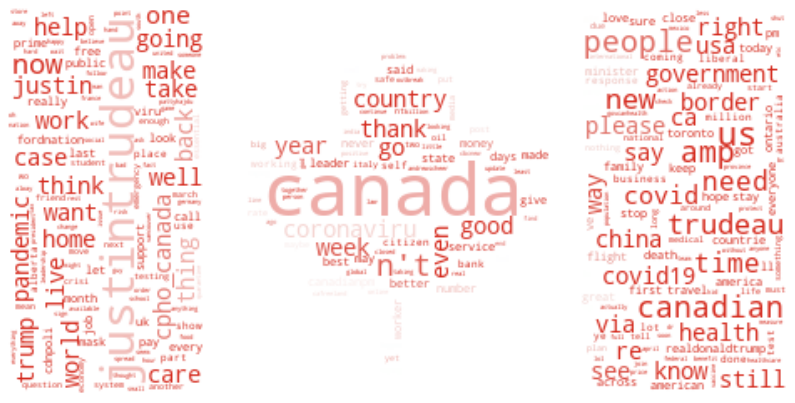

In [54]:
plt.figure(figsize=(14,8))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.imshow(wcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# store to file
plt.savefig("../img/canada_word_cloud.jpg", format="jpg")